<center><h1>Binary Classification</h1></center>

In [1]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

## Reading dataset

In [3]:
data_2c = arff.loadarff('column_2C_weka.arff')
#print(data_2c)

In [4]:
df_2c = pd.DataFrame(data_2c[0])
df_2c['class'] = df_2c['class'].replace([b'Abnormal',b'Normal'], [1, 0])
df_2c.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [36]:
print(df_2c.shape)

(310, 7)


## Exploratory Data Analysis

### Scatterplots

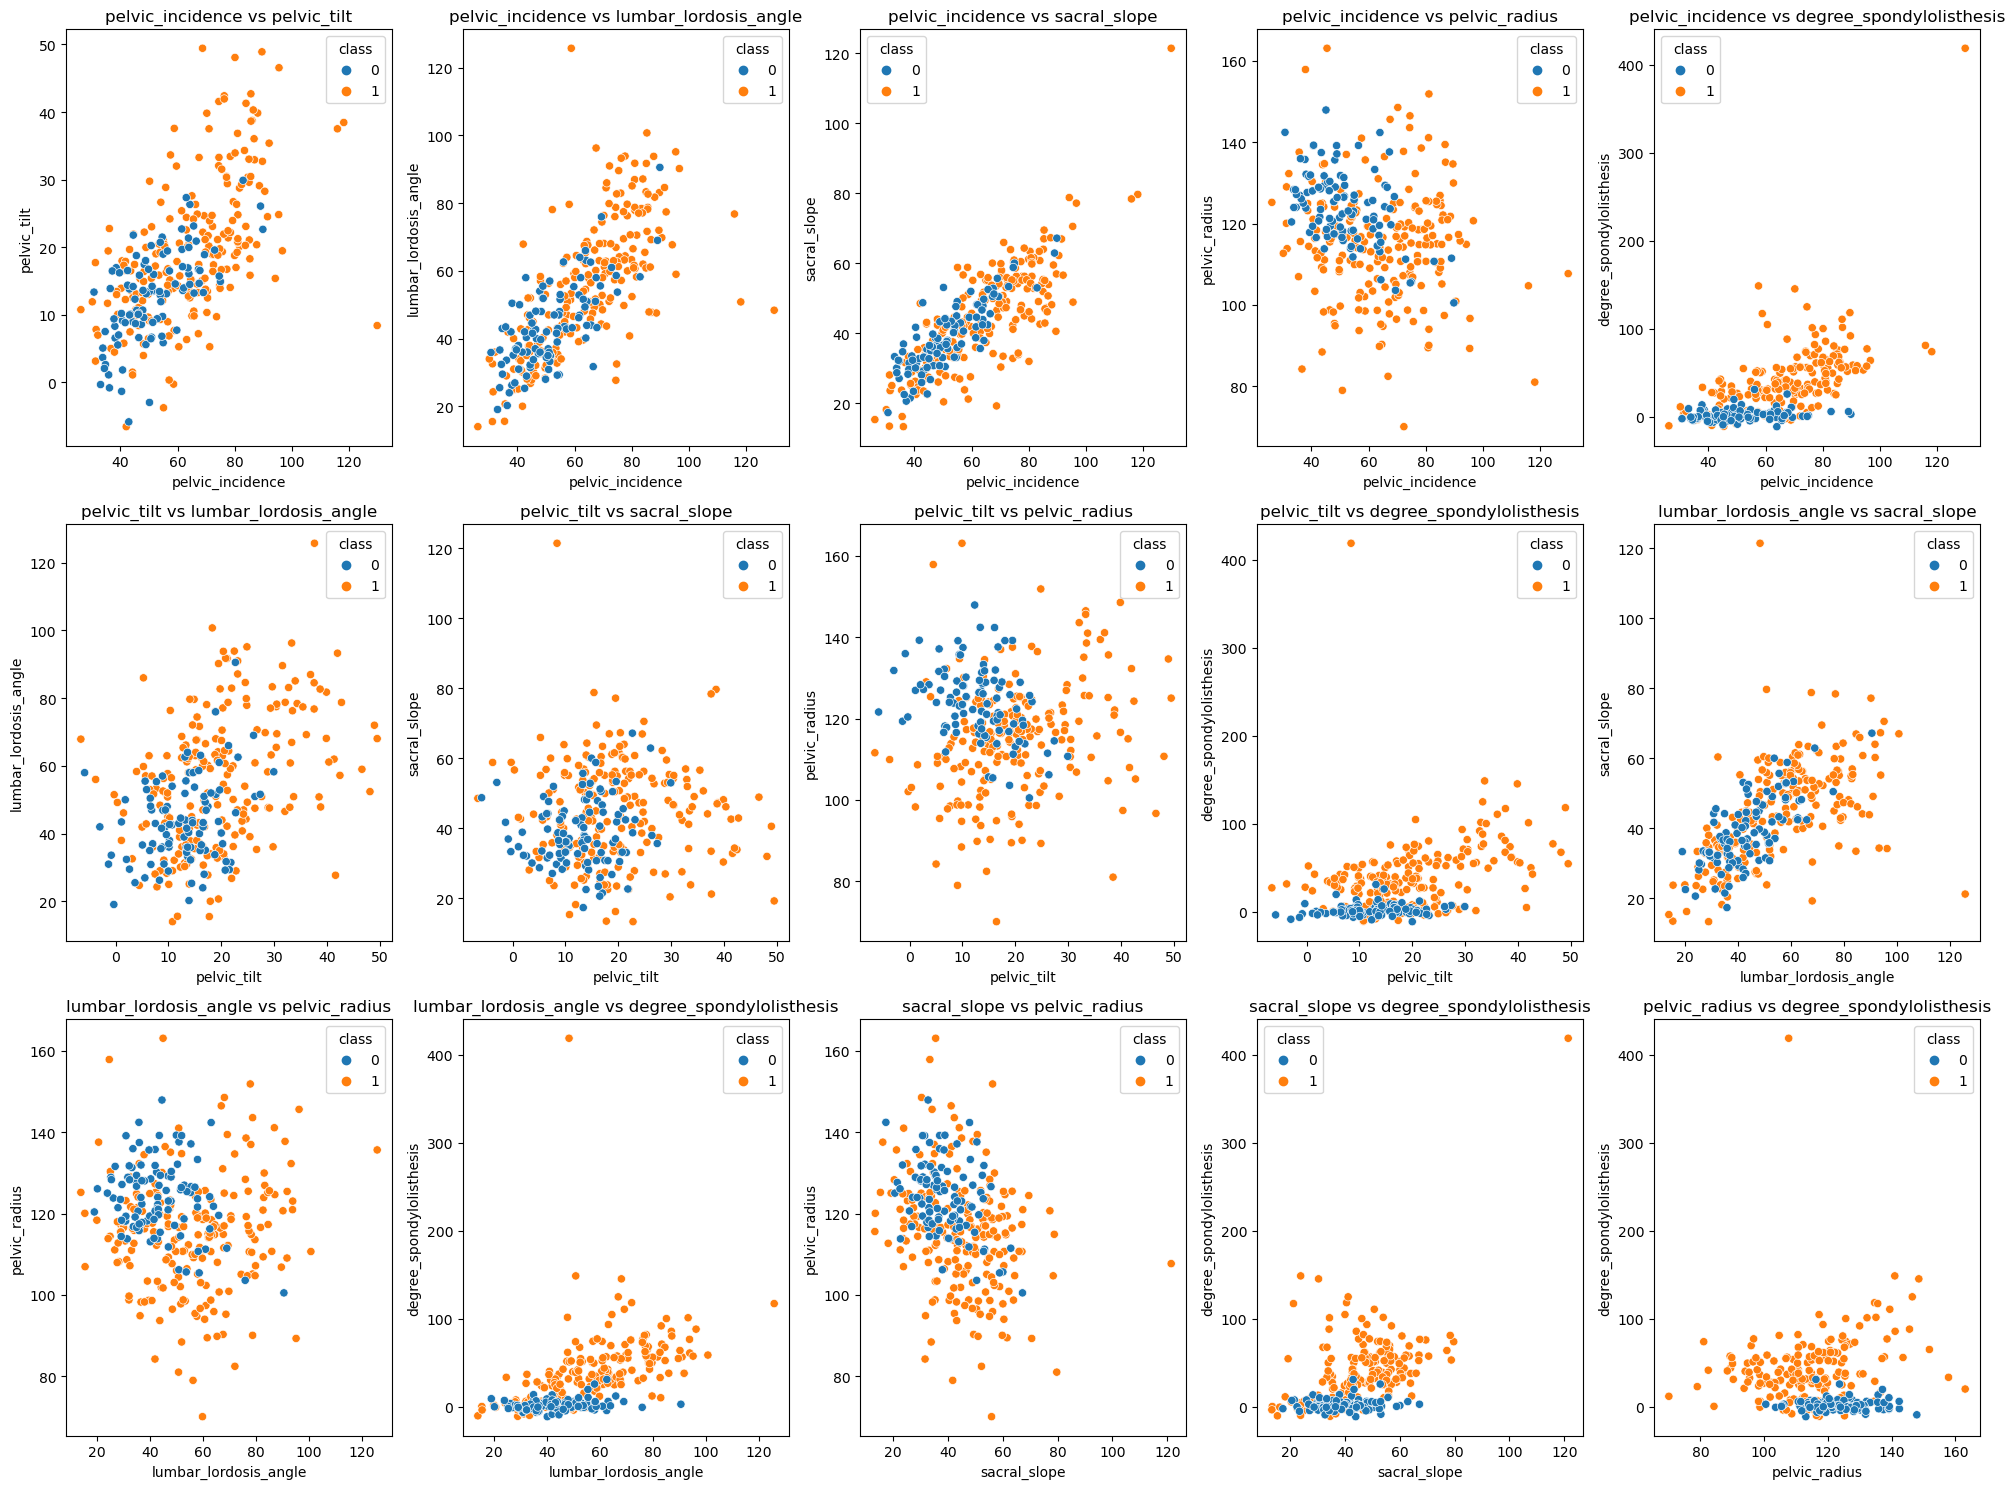

In [37]:
ind_var = df_2c.columns[:-1] 

# Create a figure size 
plt.figure(figsize = (20, 15))  

# Index for subplot
plot_number_scatter = 1

# scatter plots 
for i in range(len(ind_var)):
    for j in range(i + 1, len(ind_var)):
        plt.subplot(3, 5, plot_number_scatter)  # 3 rows, 5 columns
        sns.scatterplot(data = df_2c, x = ind_var[i], y = ind_var[j], hue = 'class')
        plt.title(f'{ind_var[i]} vs {ind_var[j]}')
        plot_number_scatter += 1


plt.tight_layout() # automatically adjust the size and positions 
plt.show()


### Boxplots

In [38]:
print(ind_var)

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')


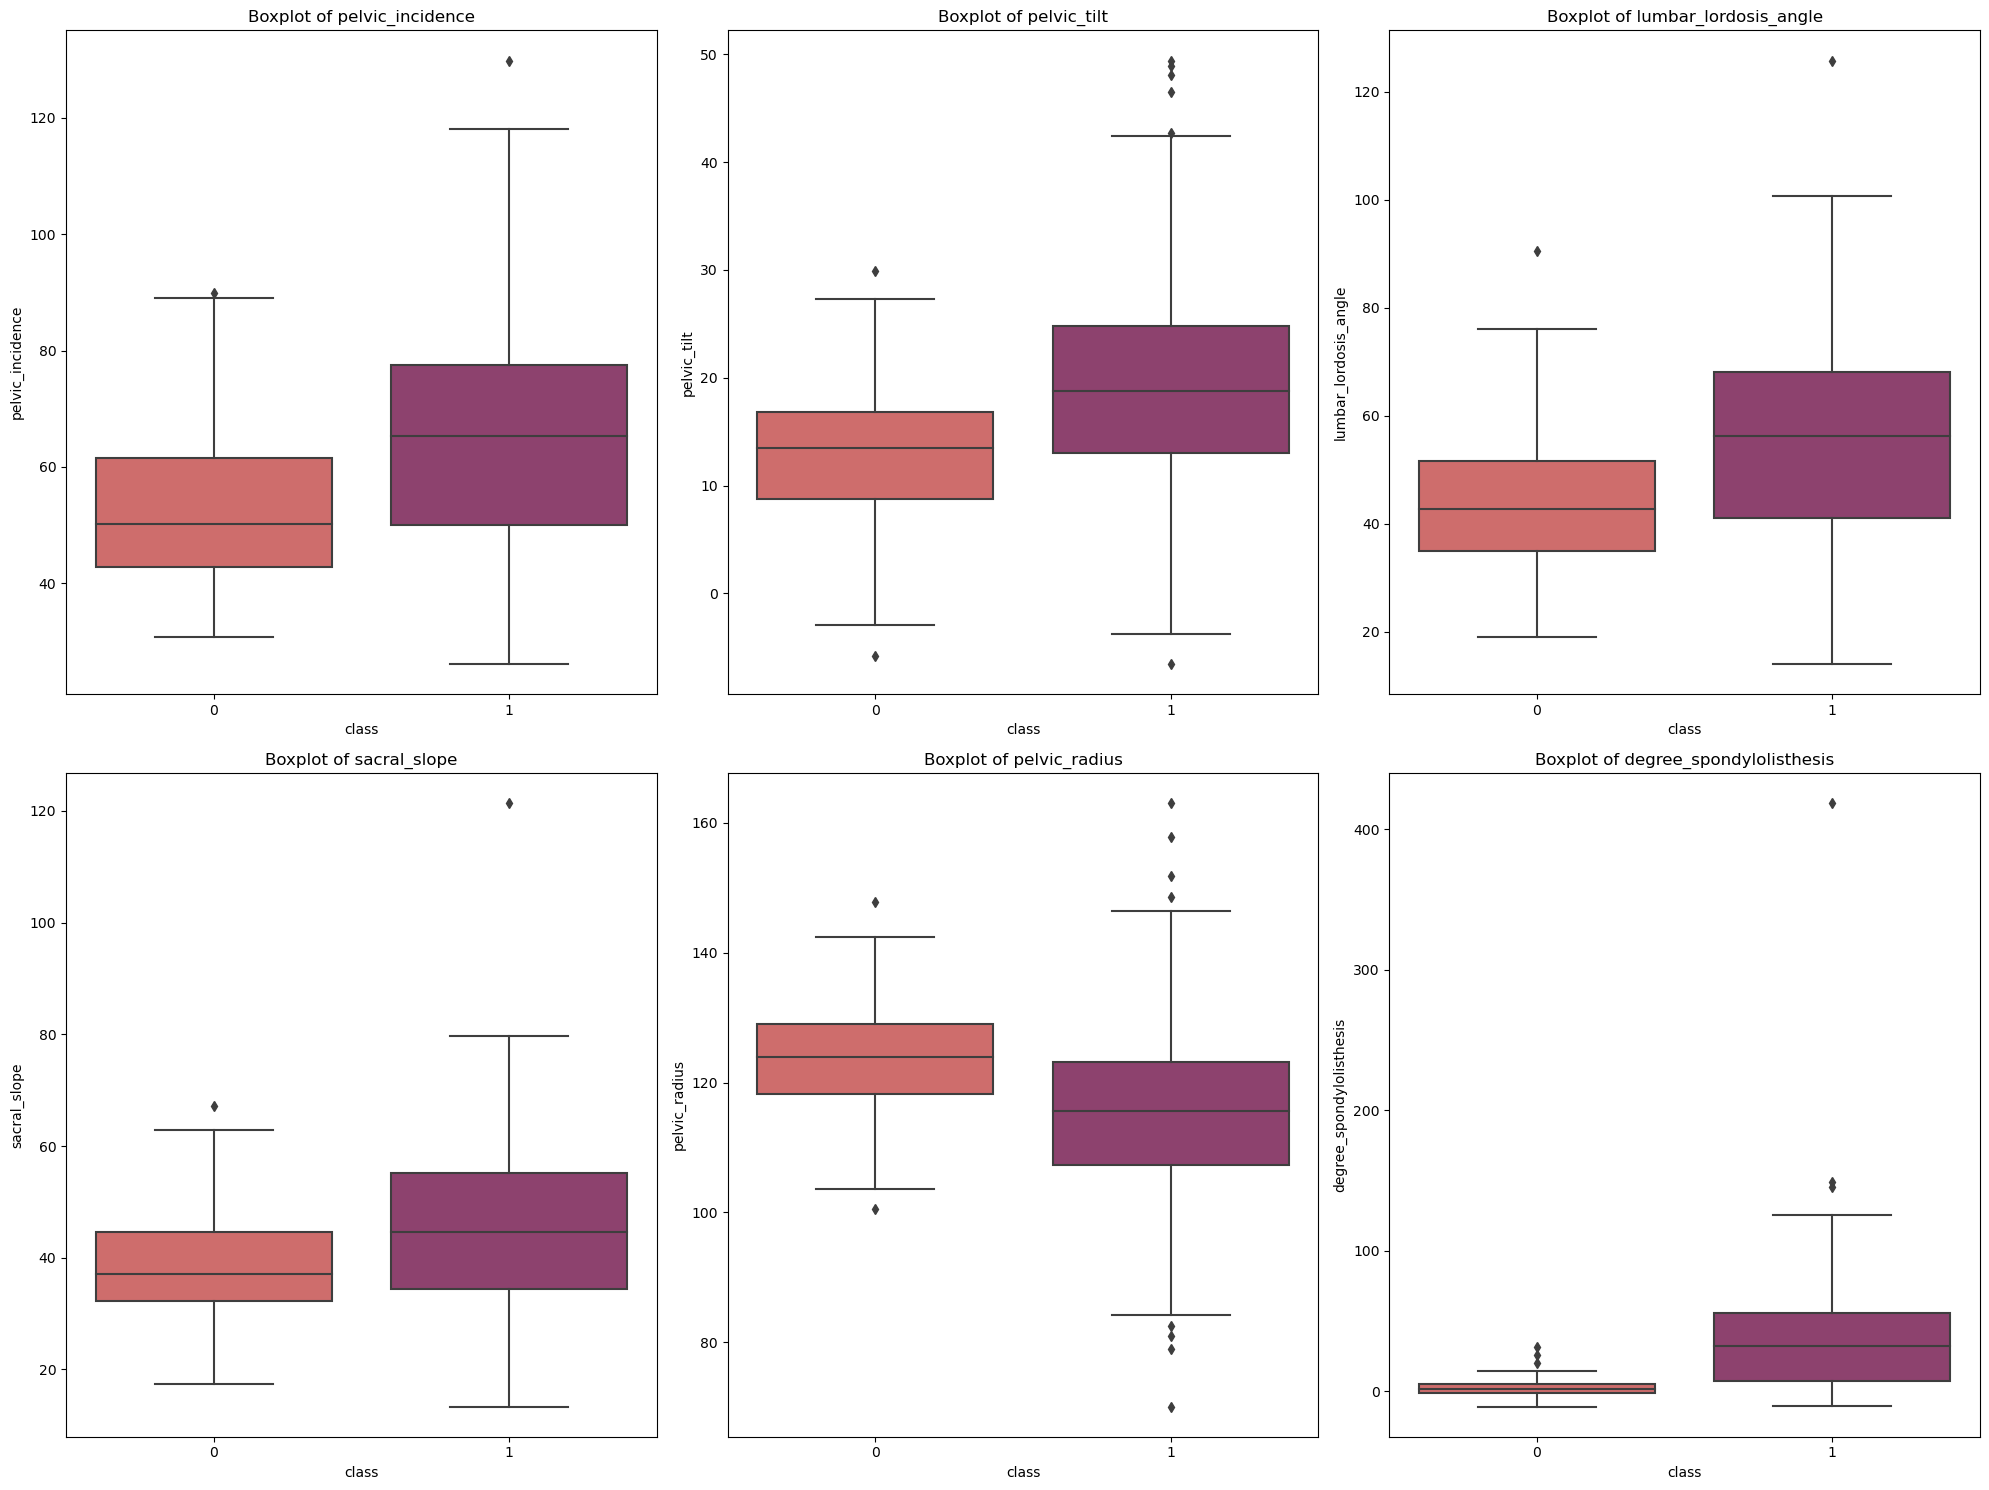

In [39]:
plt.figure(figsize = (20,15))

plot_number_box = 1


for column in df_2c.drop('class', axis=1).columns:
    plt.subplot(2,3,plot_number_box)
    sns.boxplot(x='class', y=column, data=df_2c, palette="flare")
    plt.title(f'Boxplot of {column}')
    plot_number_box += 1
    
plt.tight_layout()    
plt.show()


## Classification using KNN with different distance metric

### Split Data Set

In [40]:
df_2c.shape

(310, 7)

In [41]:
# Separate the DataFrame 
train_class_0 = df_2c[df_2c['class'] == 0]
train_class_1 = df_2c[df_2c['class'] == 1]

# Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set 
train_set = pd.concat([train_class_0.iloc[:70], train_class_1.iloc[:140]])

# Select the rest of the data as the test set
test_set = pd.concat([train_class_0.iloc[70:], train_class_1.iloc[140:]])

In [42]:
# print(train_set.shape)
train_set.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1
139,85.095503,21.069897,91.734792,64.025606,109.062312,38.032831,1


### Euclidean Metric

In [43]:
# For a given test sample, identify 'k' points in the training set that are closest to it ('k-nearest'). 
# These neighbors are identified based on the shortest Euclidean distance.
k = 0 # for defualt
KNN_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

In [44]:
k_list = list(range(208, 0, -3)) 
train_errors = []
test_errors = []

# Separate labels
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']
X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

In [45]:
# Testing for each k
for k in k_list:
    
    # fitting data
    KNN_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    KNN_classifier.fit(X_train, y_train)

    # Predict 
    y_train_pred = KNN_classifier.predict(X_train)
    # Calculat error for the training set
    accuracy_train = accuracy_score(y_train, y_train_pred)
    train_errors.append(1 - accuracy_train)

    # Predict and calculat error for the test set
    y_test_pred = KNN_classifier.predict(X_test)
    
    accuracy_test = accuracy_score(y_test, y_test_pred)
    test_errors.append(1 - accuracy_test)

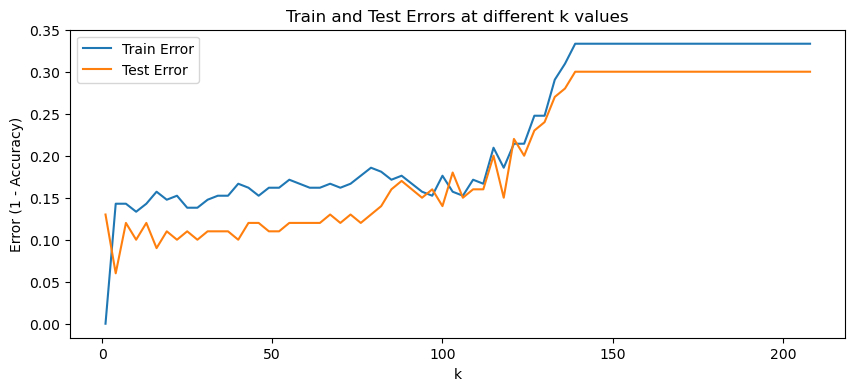

In [46]:
# Plotting the results
plt.figure(figsize=(10, 4))
plt.plot(k_list, train_errors, label='Train Error')
plt.plot(k_list, test_errors, label='Test Error')
plt.xlabel('k')
plt.ylabel('Error (1 - Accuracy)')
plt.title('Train and Test Errors at different k values')
plt.legend()
plt.show()

In [47]:
# find k* (the optimal k value)
min_test_error = min(test_errors)
k_star_index = test_errors.index(min(test_errors))
k_star = k_list[k_star_index]

print(f"Minimum error: {min_test_error} at index of {k_star_index} in the k_list")
print(f"Optimal k (k*): {k_star}")
# K* is optimal when the test error is minimized, in this case K* = 68

Minimum error: 0.06000000000000005 at index of 68 in the k_list
Optimal k (k*): 4


In [48]:
# Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred, output_dict=True)

# recall for the positive class
true_positive_rate = report['1']['recall']  
# recall for the negative class
true_negative_rate = report['0']['recall']  
# precision
precision = report['1']['precision']
# F1-score
f1_score = report['1']['f1-score']


print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"True Positive Rate: {true_positive_rate}")
print(f"True Negative Rate: {true_negative_rate}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")


Confusion Matrix:
[[20 10]
 [ 3 67]]

True Positive Rate: 0.9571428571428572
True Negative Rate: 0.6666666666666666
Precision: 0.8701298701298701
F1 Score: 0.9115646258503401


### Learning Curve

In [49]:
training_set_sizes = range(10, 211, 20)
training_set_sizes

range(10, 211, 20)

In [50]:
N = list(range(10, 211, 10)) 
print(N)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]


In [51]:
train_class_1 .tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1
209,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,1


In [52]:
train_set_N = list(range(10, 211, 10)) 
best_error_rates = []

for N in train_set_N:
    # Select first ⌊N/3⌋ rows of Class 0
    N_class_0 = train_class_0.iloc[:N//3]

    # Select N − ⌊N/3⌋ rows of Class 1
    N_class_1 = train_class_1.iloc[:(N - N//3)]

    # training data
    N_train_data = pd.concat([N_class_0, N_class_1])
    X_train_N = N_train_data.drop('class', axis=1)
    y_train_N = N_train_data['class']

    # Initialize the best error rate
    best_error_rate = np.inf
    
    # Optimal k for the current N
    optimal_k_N = 1

    # Train and test each value of k
    for k in range(1, N, 5): 
        
        # Make sure k does not exceed the number of training samples
        if k > len(X_train_N):
            break

        classifier_N = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

        classifier_N.fit(X_train_N, y_train_N)

        y_pred_N = classifier_N.predict(X_test)

        # error rate
        error_rate = 1 - accuracy_score(y_test, y_pred_N)

        # Update the best error rate and optimal k if the current error rate is lower
        if error_rate < best_error_rate:
            best_error_rate = error_rate
            optimal_k = k

    best_error_rates.append(best_error_rate)


In [53]:
print(min(best_error_rates))

0.07999999999999996


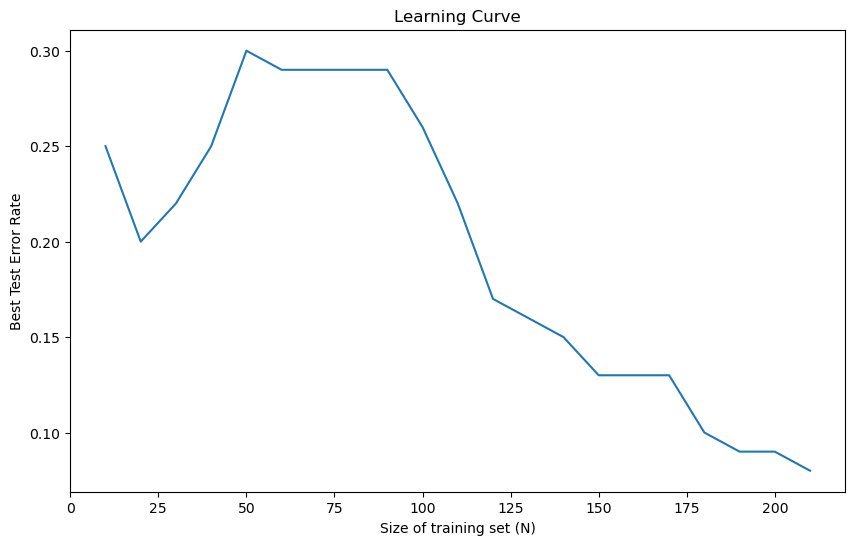

In [54]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_set_N, best_error_rates)
plt.xlabel('Size of training set (N)')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.show()

### Minkowski Distance (Manhattan Distance with p = 1)

In [55]:
k_list_MD = list(range(1,197,5))

In [56]:
# calculates the sum of the absolute values of the difference of the coordinates of the two points, 
# rather than squaring them and then calculating the squared root of the sum.
test_error_MD = {}


# Iterate over k values
for k in k_list_MD:

    classifier_MD = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    
    classifier_MD.fit(X_train, y_train)
    
    y_pred_MD = classifier_MD.predict(X_test)
    
    # test error
    test_error_MD[k] = 1 - accuracy_score(y_test, y_pred_MD)

# Find the optimal k (k*)
optimal_k_MD = min(test_error_MD, key=test_error_MD.get)
optimal_error_MD = test_error_MD[optimal_k_MD]

# summarizing test errors
error_summary_MD = pd.DataFrame(list(test_error_MD.items()), columns=['k', 'Test Error'])

# summary
print(error_summary_MD)
print(f"Optimal k (k*): {optimal_k_MD} with Test Error: {optimal_error_MD}")


      k  Test Error
0     1        0.11
1     6        0.11
2    11        0.11
3    16        0.12
4    21        0.12
5    26        0.11
6    31        0.12
7    36        0.13
8    41        0.13
9    46        0.13
10   51        0.14
11   56        0.13
12   61        0.15
13   66        0.15
14   71        0.14
15   76        0.14
16   81        0.16
17   86        0.15
18   91        0.20
19   96        0.20
20  101        0.22
21  106        0.21
22  111        0.23
23  116        0.21
24  121        0.22
25  126        0.24
26  131        0.28
27  136        0.28
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30
Optimal k (k*): 1 with Test Error: 0.10999999999999999


### Run k with different value

In [57]:
# when K = 1,6,11,26, the test error are all min at around 0.1. Smaller values of k (like k=1) often
# lead to models with high variance and low bias, which can result in overfitting to the training data. 
# On the other hand, larger values of k can lead to models with high bias and low variance, 
# which might underfit the data. In this case, we will go with k=6 for good balance.
optimial_k_MD = 6
log_p = np.arange(0.1, 1.1, 0.1)
p_values = np.power(10, log_p)
test_error_p = []

for p in p_values:
    
    classifier_p = KNeighborsClassifier(n_neighbors=optimial_k_MD, metric='minkowski', p=p)
    
    classifier_p.fit(X_train, y_train)
    
    y_pred_p = classifier_p.predict(X_test)

    # test error
    test_error_p.append(1 - accuracy_score(y_test, y_pred_p))

# best p value with the minimum test error
min_error_index_p = np.argmin(test_error_p) # find the index of the minimum value in a given array
best_p = p_values[min_error_index_p]
best_log10_p = log_p[min_error_index_p]
best_errorP = test_error_p[min_error_index_p]

# Output summary
print(f"Best log10(p): {best_log10_p}\nCorresponding p: {best_p}\nTest Error: {best_errorP}")

Best log10(p): 0.6
Corresponding p: 3.9810717055349722
Test Error: 0.06000000000000005


### Chebyshev Distance (p  = infinity)

In [58]:
test_error_ch = {}


for k in k_list_MD:

    classifier_ch = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    
    classifier_ch.fit(X_train, y_train)
    
    y_pred_ch = classifier_ch.predict(X_test)
    
    # test error
    test_error_ch[k] = 1 - accuracy_score(y_test, y_pred_ch)

# Find the optimal k (k*)
optimal_k_ch = min(test_error_ch, key=test_error_ch.get)
optimal_error_ch = test_error_ch[optimal_k_ch]

# summarizing test errors
error_summary_ch = pd.DataFrame(list(test_error_ch.items()), columns=['k', 'Test Error'])

# Output the summary and the optimal k
print(error_summary_ch)
print(f"Optimal k (k*): {optimal_k_ch} with Test Error: {optimal_error_ch}")

      k  Test Error
0     1        0.13
1     6        0.10
2    11        0.12
3    16        0.08
4    21        0.11
5    26        0.12
6    31        0.12
7    36        0.10
8    41        0.13
9    46        0.12
10   51        0.12
11   56        0.12
12   61        0.14
13   66        0.13
14   71        0.14
15   76        0.11
16   81        0.14
17   86        0.12
18   91        0.15
19   96        0.14
20  101        0.19
21  106        0.18
22  111        0.18
23  116        0.18
24  121        0.21
25  126        0.21
26  131        0.25
27  136        0.28
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30
Optimal k (k*): 16 with Test Error: 0.07999999999999996


### Mahalanobis Distance.

In [59]:
# inverse of the covariance matrix
cov_matrix = np.cov(X_train, rowvar=False)
inv_cov_matrix = np.linalg.pinv(cov_matrix)

# Dictionary to store test errors for each k
test_errors_Maha_dis = {}

# Iterate over k values
for k in k_list_MD:
    # Mahalanobis distance
    classifier_Maha_dis = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', 
                                               metric_params={'VI': inv_cov_matrix}) #VI (the inverse of the covariance matrix)

    classifier_Maha_dis.fit(X_train, y_train)

    y_pred_Maha_dis = classifier_Maha_dis.predict(X_test)

    # test error
    test_errors_Maha_dis[k] = 1 - accuracy_score(y_test, y_pred_Maha_dis)

# optimal k (k*)
optimal_k_Maha_dis = min(test_errors_Maha_dis, key=test_errors_Maha_dis.get)
optimal_error_Maha_dis = test_errors_Maha_dis[optimal_k_Maha_dis]

# summarizing test errors
error_summary_Maha_dis = pd.DataFrame(list(test_errors_Maha_dis.items()), columns=['k', 'Test Error'])

# Output
print(error_summary_Maha_dis)
print(f"Optimal k (k*): {optimal_k_Maha_dis} with Test Error: {optimal_error_Maha_dis}")


      k  Test Error
0     1        0.15
1     6        0.16
2    11        0.18
3    16        0.17
4    21        0.20
5    26        0.17
6    31        0.21
7    36        0.21
8    41        0.19
9    46        0.22
10   51        0.21
11   56        0.21
12   61        0.23
13   66        0.21
14   71        0.22
15   76        0.21
16   81        0.24
17   86        0.21
18   91        0.24
19   96        0.24
20  101        0.24
21  106        0.23
22  111        0.25
23  116        0.26
24  121        0.29
25  126        0.29
26  131        0.30
27  136        0.30
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30
Optimal k (k*): 1 with Test Error: 0.15000000000000002


### Weighted Decision

In [60]:
distances_methods = ['euclidean', 'manhattan', 'chebyshev']

# store best test errors for each distance metric
best_test_errors_each_dis = {}
for distance in distances_methods:
    best_test_errors_each_dis[distance] = {'k': None, 'error': np.inf}


# Iterate over each distance metric
for distance in distances_methods:
    
    for k in k_list_MD:
        # ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors 
        # of a query point will have a greater influence than neighbors which are further away.
        classifier_weigited_vo = KNeighborsClassifier(n_neighbors=k, metric=distance, weights='distance')
        
        classifier_weigited_vo.fit(X_train, y_train)

        y_pred_weigited_vo = classifier_weigited_vo.predict(X_test)

        # test error
        test_error_weigited_vo = 1 - accuracy_score(y_test, y_pred_weigited_vo)

        # Update the best test error for this distance metric
        if test_error_weigited_vo < best_test_errors_each_dis[distance]['error']:
            best_test_errors_each_dis[distance]['k'] = k
            best_test_errors_each_dis[distance]['error'] = test_error_weigited_vo

# Summarize in a DataFrame
error_summary_weigited_vo = pd.DataFrame(best_test_errors_each_dis)
error_summary_weigited_vo = error_summary_weigited_vo.transpose()
error_summary_weigited_vo.columns = ['Optimal k', 'Best Test Error']

# Output
print(error_summary_weigited_vo)

           Optimal k  Best Test Error
euclidean        6.0             0.10
manhattan       26.0             0.10
chebyshev       16.0             0.11


### Summary

The lowest training error rate achieved in this homework based on the table is 0.1. It's achieved when we use euclidean distance with k = 6 or manhattan distance with k = 26

### Reference

* [Seaborn.objects.Plot](https://seaborn.pydata.org/generated/seaborn.objects.Plot.html)
* [Matplotlib.pyplot.subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)
* [Color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [K-Nearest Neighbors (KNN) Classification with scikit-learn](https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn) 
* [How to find the optimal value of K in KNN](https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,the%20most%20favorable%20K%20value.)
* [Minkowski Distance:](https://aigents.co/data-science-blog/publication/distance-metrics-for-machine-learning)
* [DistanceMetric¶](https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric.get_metric)
* [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

* [Numpy.argmin](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html)
* [Convert Dictionary to Pandas Dataframe](https://www.geeksforgeeks.org/how-to-convert-dictionary-to-pandas-dataframe/)
* [Mahalanobis Distance 1](https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics)
* [Mahalanobis Distance 2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html#scipy.spatial.distance.mahalanobis)
* [Mahalanobis Distance 3](https://github.com/scipy/scipy/blob/v1.12.0/scipy/spatial/distance.py#L992-L1036)
* [Mahalanobis distance in sklearn DistanceMetrics](https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics)